In [105]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To undersample and oversample the data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [106]:
data = pd.read_csv("Cardiac.csv")

<IPython.core.display.Javascript object>

In [107]:
!pip install imblearn

<IPython.core.display.Javascript object>

In [3]:
data.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,UnderRisk
0,Male,1,1,0,1,0,0,0,1,0,0,0,no
1,Male,0,1,0,1,0,0,0,1,0,0,0,no
2,Male,0,1,0,1,0,0,0,1,0,0,0,no
3,Male,0,1,0,1,0,0,0,1,0,0,0,no
4,Male,0,0,0,0,0,1,1,0,0,0,0,no


<IPython.core.display.Javascript object>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Gender                           889 non-null    object
 1   Chain_smoker                     889 non-null    int64 
 2   Consumes_other_tobacco_products  889 non-null    int64 
 3   HighBP                           889 non-null    int64 
 4   Obese                            889 non-null    int64 
 5   Diabetes                         889 non-null    int64 
 6   Metabolic_syndrome               889 non-null    int64 
 7   Use_of_stimulant_drugs           889 non-null    int64 
 8   Family_history                   889 non-null    int64 
 9   History_of_preeclampsia          889 non-null    int64 
 10  CABG_history                     889 non-null    int64 
 11  Respiratory_illness              889 non-null    int64 
 12  UnderRisk                        889

<IPython.core.display.Javascript object>

In [5]:
round(data.isnull().sum() / data.isnull().count() * 100, 2)

Gender                            0.000
Chain_smoker                      0.000
Consumes_other_tobacco_products   0.000
HighBP                            0.000
Obese                             0.000
Diabetes                          0.000
Metabolic_syndrome                0.000
Use_of_stimulant_drugs            0.000
Family_history                    0.000
History_of_preeclampsia           0.000
CABG_history                      0.000
Respiratory_illness               0.000
UnderRisk                         0.000
dtype: float64

<IPython.core.display.Javascript object>

In [6]:
data.isna().sum()

Gender                             0
Chain_smoker                       0
Consumes_other_tobacco_products    0
HighBP                             0
Obese                              0
Diabetes                           0
Metabolic_syndrome                 0
Use_of_stimulant_drugs             0
Family_history                     0
History_of_preeclampsia            0
CABG_history                       0
Respiratory_illness                0
UnderRisk                          0
dtype: int64

<IPython.core.display.Javascript object>

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Chain_smoker,889.000,0.120,0.326,0.000,0.000,0.000,0.000,1.000
Consumes_other_tobacco_products,889.000,0.838,0.369,0.000,1.000,1.000,1.000,1.000
HighBP,889.000,0.087,0.281,0.000,0.000,0.000,0.000,1.000
Obese,889.000,0.919,0.273,0.000,1.000,1.000,1.000,1.000
Diabetes,889.000,0.055,0.228,0.000,0.000,0.000,0.000,1.000
Metabolic_syndrome,889.000,0.043,0.202,0.000,0.000,0.000,0.000,1.000
Use_of_stimulant_drugs,889.000,0.082,0.275,0.000,0.000,0.000,0.000,1.000
Family_history,889.000,0.926,0.262,0.000,1.000,1.000,1.000,1.000
History_of_preeclampsia,889.000,0.018,0.133,0.000,0.000,0.000,0.000,1.000
CABG_history,889.000,0.021,0.145,0.000,0.000,0.000,0.000,1.000


<IPython.core.display.Javascript object>

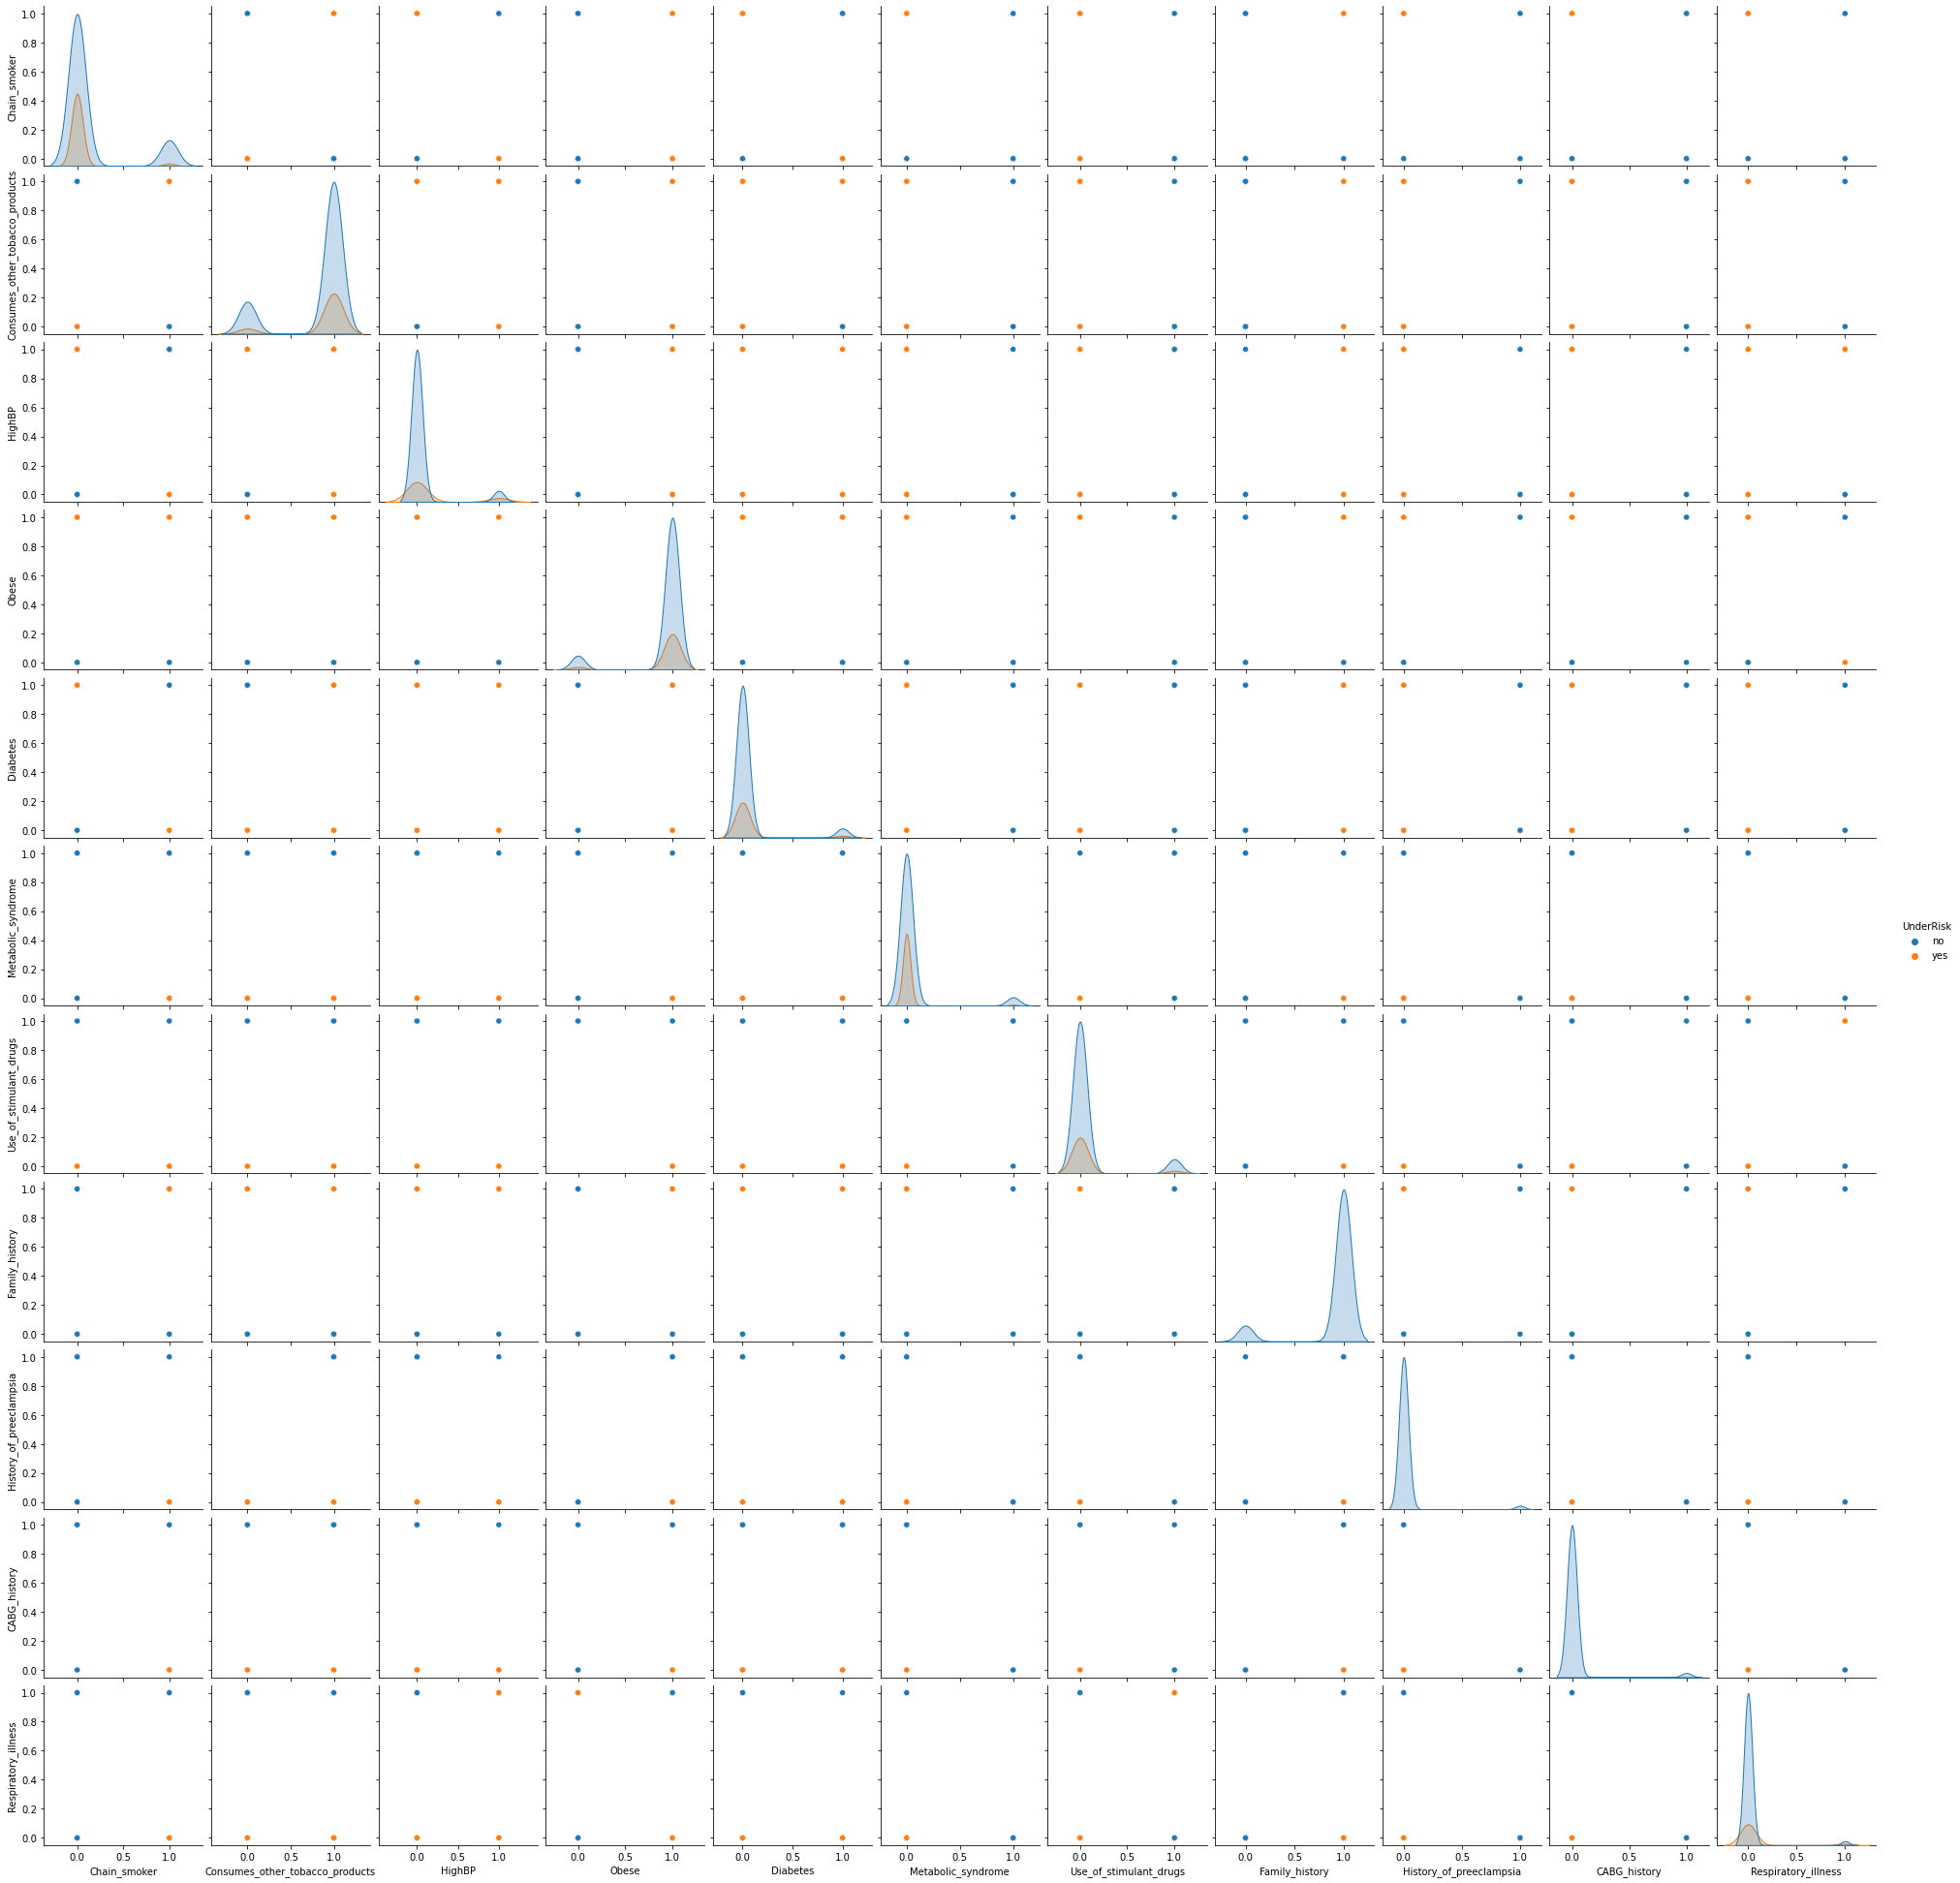

<IPython.core.display.Javascript object>

In [8]:
sns.pairplot(data, hue="UnderRisk")

In [9]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

UnderRisk      no  yes  All
Chain_smoker               
All           699  190  889
0             598  184  782
1             101    6  107
------------------------------------------------------------------------------------------------------------------------


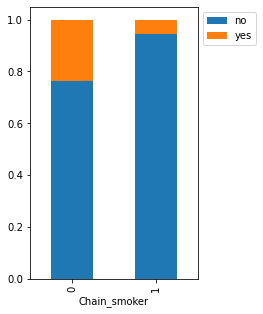

<IPython.core.display.Javascript object>

In [10]:
stacked_barplot(data, "Chain_smoker", "UnderRisk")

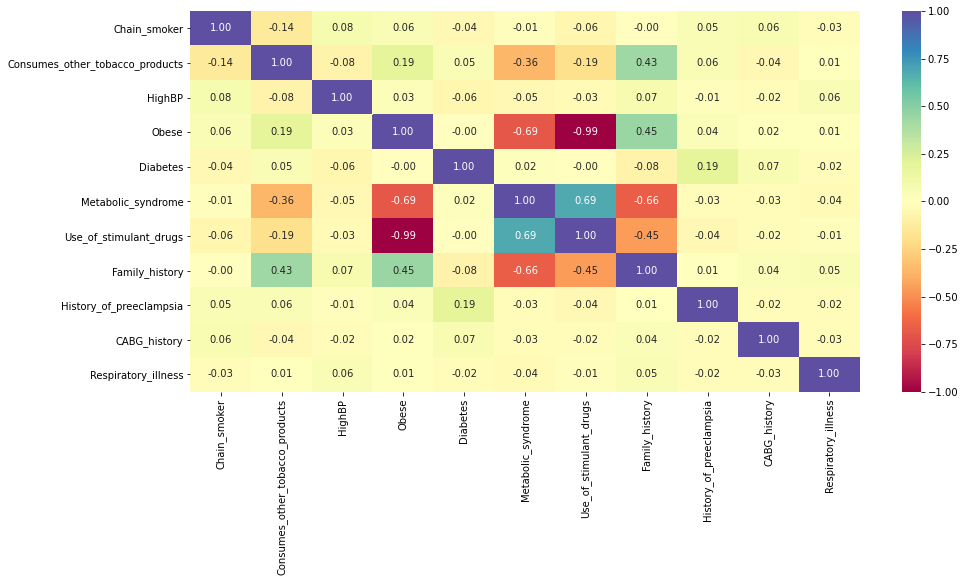

<IPython.core.display.Javascript object>

In [11]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [91]:
df = data.copy()

<IPython.core.display.Javascript object>

In [92]:
df.sample(10)

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,UnderRisk
70,Female,0,1,0,1,0,0,0,1,0,0,0,yes
646,Male,0,1,0,1,1,0,0,1,0,0,0,no
549,Male,1,1,0,1,0,0,0,1,0,0,0,no
328,Female,0,1,0,1,0,0,0,1,0,0,0,no
237,Male,0,0,0,1,0,0,0,1,0,0,0,no
634,Female,0,1,0,1,1,0,0,1,0,0,0,no
884,Female,0,1,0,1,0,0,0,1,0,0,0,no
438,Male,1,1,0,1,0,0,0,1,0,0,0,no
292,Male,0,1,0,1,0,0,0,1,0,0,0,no
103,Male,0,1,0,1,0,0,0,1,0,0,0,no


<IPython.core.display.Javascript object>

In [93]:
X = df.drop(["UnderRisk"], axis=1)
y = df["UnderRisk"]

<IPython.core.display.Javascript object>

In [94]:
# Splitting data into training, validation and test sets:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(533, 12) (178, 12) (178, 12)


<IPython.core.display.Javascript object>

In [95]:
X_train.sample()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness
452,Male,0,1,0,1,1,0,0,1,0,0,0


<IPython.core.display.Javascript object>

In [96]:
# can do one hot encoding with get_dummies
X_train = pd.get_dummies(X_train, columns=["Gender"], drop_first=True)
X_val = pd.get_dummies(X_val, columns=["Gender"], drop_first=True)
X_test = pd.get_dummies(X_test, columns=["Gender"], drop_first=True)

<IPython.core.display.Javascript object>

In [97]:
X_train.sample(5)

,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,Gender_Male,Gender_Other
668,0,1,0,1,0,0,0,1,0,0,0,0,0
629,0,1,0,1,1,0,0,1,0,0,0,1,0
280,0,1,0,1,0,0,0,1,0,0,0,1,0
720,1,1,0,1,0,0,0,1,0,0,1,1,0
517,0,1,0,1,0,0,0,1,0,0,0,1,0


<IPython.core.display.Javascript object>

In [98]:
X_train.shape

(533, 13)

<IPython.core.display.Javascript object>

In [99]:
# can do one hot encoding with get_dummies
y_train = pd.get_dummies(y_train, columns=["UnderRisk"], drop_first=True)
y_val = pd.get_dummies(y_val, columns=["UnderRisk"], drop_first=True)
y_test = pd.get_dummies(y_test, columns=["UnderRisk"], drop_first=True)

<IPython.core.display.Javascript object>

In [100]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

In [108]:
regression_model.score(X_test, y_test)

0.06243451427397617

<IPython.core.display.Javascript object>

In [114]:
# Fit SMOTE on train data(Synthetic Minority Oversampling Technique)
sm = SMOTE(sampling_strategy=0.4, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>

In [115]:
regression_model_smote = LinearRegression()
regression_model_smote.fit(X_train_over, y_train_over)

LinearRegression()

<IPython.core.display.Javascript object>

In [117]:
pred_train = regression_model_smote.predict(X_train_over)
pred_val = regression_model_smote.predict(X_val)

<IPython.core.display.Javascript object>

In [122]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
score = []
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    score.append(scores)
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Bagging: 23.386809269162207
Random forest: 22.7807486631016
GBM: 13.832442067736187
Adaboost: 10.249554367201426
Xgboost: 19.83957219251337
dtree: 24.563279857397504

Validation Performance:

Bagging: 0.13157894736842105
Random forest: 0.10526315789473684
GBM: 0.05263157894736842
Adaboost: 0.07894736842105263
Xgboost: 0.05263157894736842
dtree: 0.10526315789473684


<IPython.core.display.Javascript object>

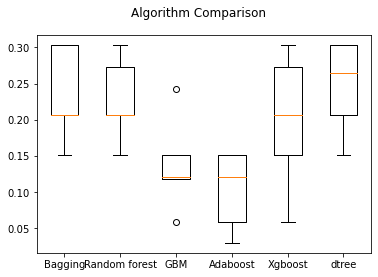

<IPython.core.display.Javascript object>

In [140]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure()

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

In [141]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [142]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [143]:
# Creating pipeline
model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 4, 5, None],
    "min_samples_split": [2, 4, 7, 10, 15],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train_over, y_train_over)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2} 
Score: 0.1855614973262032


<IPython.core.display.Javascript object>

In [144]:
# Creating new pipeline with best parameters
dtree_tuned1 = DecisionTreeClassifier(
    random_state=1, criterion="gini", max_depth=None, min_samples_split=2
)

# Fit the model on training data
dtree_tuned1.fit(X_train_over, y_train_over)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [151]:
bagging_tuned = BaggingClassifier(random_state=1)
bagging_tuned.fit(X_train_over, y_train_over)

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [152]:
bagging_tuned_grid_train = model_performance_classification_sklearn(
    bagging_tuned, X_train_over, y_train_over
)
print("Training Perforamnce:")
bagging_tuned_grid_train

Training Perforamnce:


,Accuracy,Recall,Precision,F1
0,0.749,0.257,0.652,0.369


<IPython.core.display.Javascript object>

In [153]:
# Calculating different metrics on train set
dtree_grid_train = model_performance_classification_sklearn(
    dtree_tuned1, X_train_over, y_train_over
)
print("Training performance:")
dtree_grid_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.749,0.257,0.652,0.369


<IPython.core.display.Javascript object>

In [130]:
# Calculating different metrics on validation set
dtree_grid_val = model_performance_classification_sklearn(dtree_tuned1, X_val, y_val)
print("Validation performance:")
dtree_grid_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.725,0.184,0.280,0.222


<IPython.core.display.Javascript object>

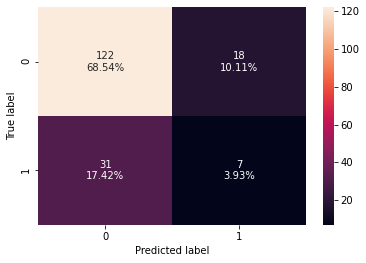

<IPython.core.display.Javascript object>

In [131]:
# creating confusion matrix
confusion_matrix_sklearn(dtree_tuned1, X_val, y_val)

In [132]:
# Creating pipeline
model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 4, 5, None],
    "min_samples_split": [2, 4, 7, 10, 15],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=20,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'min_samples_split': 4, 'max_depth': None, 'criterion': 'entropy'} with CV score=0.1855614973262032:


<IPython.core.display.Javascript object>

In [133]:
# Creating new pipeline with best parameters
dtree_tuned2 = DecisionTreeClassifier(
    random_state=1, criterion="entropy", max_depth=None, min_samples_split=2
)

# Fit the model on training data
dtree_tuned2.fit(X_train_over, y_train_over)

DecisionTreeClassifier(criterion='entropy', random_state=1)

<IPython.core.display.Javascript object>

In [134]:
# Calculating different metrics on train set
dtree_random_train = model_performance_classification_sklearn(
    dtree_tuned2, X_train_over, y_train_over
)
print("Training performance:")
dtree_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.749,0.257,0.652,0.369


<IPython.core.display.Javascript object>

In [135]:
# Calculating different metrics on validation set
dtree_random_val = model_performance_classification_sklearn(dtree_tuned2, X_val, y_val)
print("Validation performance:")
dtree_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.725,0.184,0.280,0.222


<IPython.core.display.Javascript object>

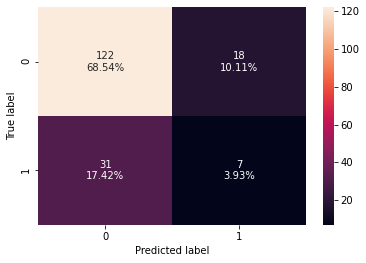

<IPython.core.display.Javascript object>

In [136]:
# creating confusion matrix
confusion_matrix_sklearn(dtree_tuned1, X_val, y_val)

In [137]:
%%time 

#defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in GridSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1, verbose= 2)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train_over,y_train_over)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits


KeyboardInterrupt: 

<IPython.core.display.Javascript object>

In [138]:
# building model with best parameters
xgb_tuned1 = XGBClassifier(
    random_state=1,
    n_estimators=50,
    scale_pos_weight=10,
    subsample=0.8,
    learning_rate=0.01,
    gamma=0,
    eval_metric="logloss",
    reg_lambda=5,
    max_depth=1,
)

# Fit the model on training data
xgb_tuned1.fit(X_train_over, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=1, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=5,
              scale_pos_weight=10, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [139]:
# Calculating different metrics on train set
xgboost_grid_train = model_performance_classification_sklearn(
    xgb_tuned1, X_train_over, y_train_over
)
print("Training performance:")
xgboost_grid_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.360,1.000,0.308,0.471


<IPython.core.display.Javascript object>

In [49]:
# Calculating different metrics on validation set
xgboost_grid_val = model_performance_classification_sklearn(xgb_tuned1, X_val, y_val)
print("Validation performance:")
xgboost_grid_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.287,1.000,0.230,0.374


<IPython.core.display.Javascript object>

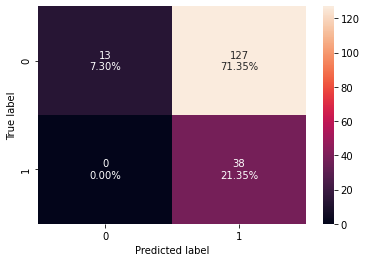

<IPython.core.display.Javascript object>

In [50]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned1, X_val, y_val)

In [51]:
%%time

# defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
xgb_tuned2 = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
xgb_tuned2.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(xgb_tuned2.best_params_,xgb_tuned2.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'reg_lambda': 5, 'n_estimators': 50, 'max_depth': 1, 'learning_rate': 0.01, 'gamma': 1} with CV score=0.9913043478260869:
CPU times: user 563 ms, sys: 231 ms, total: 794 ms
Wall time: 14.6 s


<IPython.core.display.Javascript object>

In [52]:
# building model with best parameters
xgb_tuned2 = XGBClassifier(
    random_state=1,
    n_estimators=50,
    scale_pos_weight=10,
    gamma=1,
    subsample=0.9,
    learning_rate=0.01,
    eval_metric="logloss",
    max_depth=1,
    reg_lambda=5,
)
# Fit the model on training data
xgb_tuned2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=1, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=5,
              scale_pos_weight=10, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [53]:
# Calculating different metrics on train set
xgboost_random_train = model_performance_classification_sklearn(
    xgb_tuned2, X_train, y_train
)
print("Training performance:")
xgboost_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.296,1.000,0.233,0.378


<IPython.core.display.Javascript object>

In [54]:
# Calculating different metrics on validation set
xgboost_random_val = model_performance_classification_sklearn(xgb_tuned2, X_val, y_val)
print("Validation performance:")
xgboost_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.287,1.000,0.230,0.374


<IPython.core.display.Javascript object>

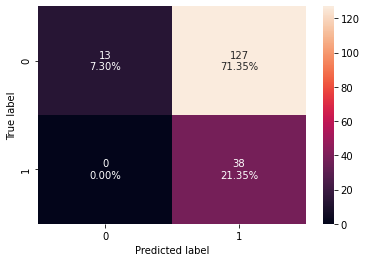

<IPython.core.display.Javascript object>

In [55]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned2, X_val, y_val)

In [56]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree_grid_train.T,
        dtree_random_train.T,
        xgboost_grid_train.T,
        xgboost_random_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree Tuned with Grid search",
    "Decision Tree Tuned with Random search",
    "Xgboost Tuned with Grid search",
    "Xgboost Tuned with Random Search",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree Tuned with Grid search,Decision Tree Tuned with Random search,Xgboost Tuned with Grid search,Xgboost Tuned with Random Search
Accuracy,0.801,0.801,0.296,0.296
Recall,0.175,0.175,1.000,1.000
Precision,0.625,0.625,0.233,0.233
F1,0.274,0.274,0.378,0.378


<IPython.core.display.Javascript object>

In [57]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [dtree_grid_val.T, dtree_random_val.T, xgboost_grid_val.T, xgboost_random_val.T,],
    axis=1,
)
models_val_comp_df.columns = [
    "Decision Tree Tuned with Grid search",
    "Decision Tree Tuned with Random search",
    "Xgboost Tuned with Grid search",
    "Xgboost Tuned with Random Search",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Decision Tree Tuned with Grid search,Decision Tree Tuned with Random search,Xgboost Tuned with Grid search,Xgboost Tuned with Random Search
Accuracy,0.736,0.736,0.287,0.287
Recall,0.105,0.105,1.000,1.000
Precision,0.235,0.235,0.230,0.230
F1,0.145,0.145,0.374,0.374


<IPython.core.display.Javascript object>

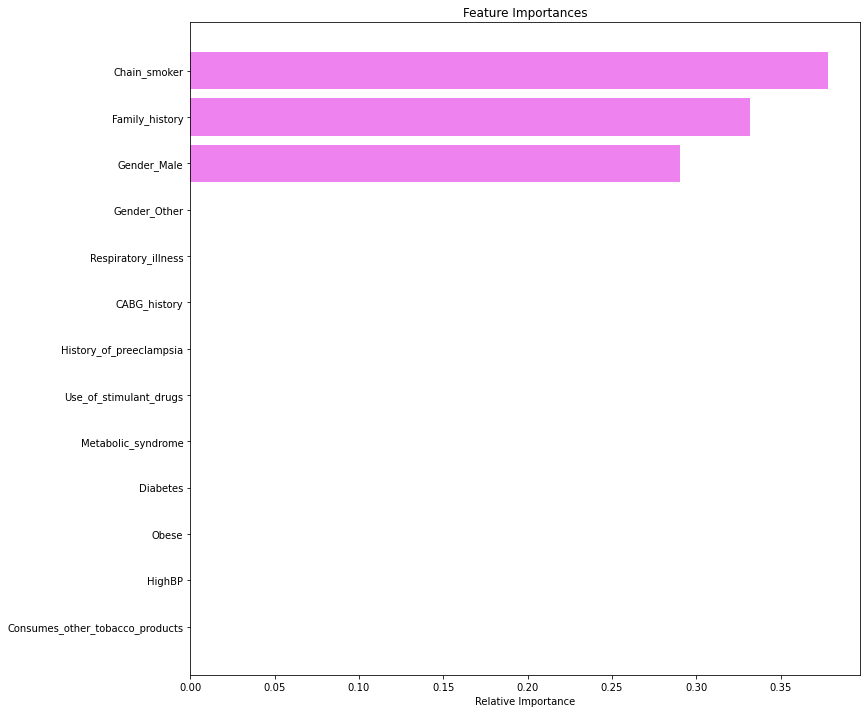

<IPython.core.display.Javascript object>

In [58]:
feature_names = X_train.columns
importances = xgb_tuned1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()